In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [4]:
!python3 -m spacy download en_core_web_sm

In [5]:
# Parameters & Constants
FILE_PATH = "../data/dontpatronizeme_pcl.tsv"


In [6]:
rows = []

with open(FILE_PATH) as f:
    for line in f.readlines()[4:]:
        par_id = line.strip().split("\t")[0]
        art_id = line.strip().split("\t")[1]
        keyword = line.strip().split("\t")[2]
        country = line.strip().split("\t")[3]
        t = line.strip().split("\t")[4]  # .lower()
        l = line.strip().split("\t")[-1]
        if l == "0" or l == "1":
            lbin = 0
        else:
            lbin = 1
        rows.append(
            {
                "par_id": par_id,
                "art_id": art_id,
                "keyword": keyword,
                "country": country,
                "text": t,
                "label": lbin,
                "orig_label": l,
            }
        )
df = pd.DataFrame(
    rows, columns=["par_id", "art_id", "keyword", "country", "text", "label", "orig_label"]
)


In [7]:
df.head()


,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0


In [8]:
# Exploratory Data Analysis

print("Original data shape: ", df.shape)
df = df.dropna()
print("Data shape after dropping NaNs: ", df.shape)


Original data shape:  (10469, 7)
Data shape after dropping NaNs:  (10469, 7)


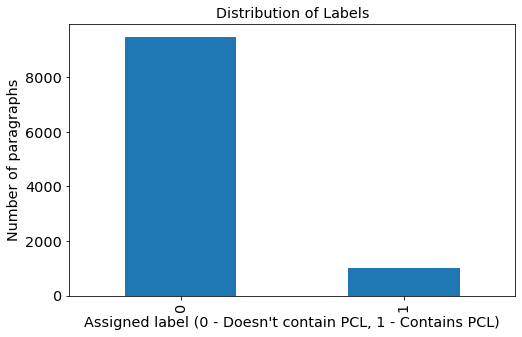

0    0.905149
1    0.094851
Name: label, dtype: float64


In [9]:
# Label Distribution
df.label.value_counts().plot(kind="bar", figsize=(8, 5))

plt.title("Distribution of Labels", fontsize="x-large")
plt.xlabel("Assigned label (0 - Doesn't contain PCL, 1 - Contains PCL)", fontsize="x-large")
plt.ylabel("Number of paragraphs", fontsize="x-large")

plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")

plt.show()

# Calculate percentage of each class
print(df.label.value_counts(normalize=True))


We can see that the dataset is imbalanced, with an approximate ratio of 9:1.


## Which features seem to affect the prediction?

### 1. Length of text

### 2. Country

### 3. Keyword


In [10]:
import spacy

spacy_en = spacy.load("en_core_web_sm")


def tokenizer(text):  # create a custom tokenizer function
    return [tok.text for tok in spacy_en.tokenizer(text)]


df["text_tokenised"] = df["text"].apply(tokenizer)
df["text_length"] = df["text_tokenised"].apply(len)

# Plot the distribution of text length per label
ax = df.groupby("label").text_length.hist(alpha=0.5, bins=50)

plt.title("Distribution of Text Length per Label", fontsize="x-large")
plt.xlabel("Text length", fontsize="x-large")
plt.ylabel("Number of paragraphs", fontsize="x-large")

plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")

plt.legend(["0: Doesn't contain PCL", "1: Contains PCL"], fontsize="x-large")

plt.show()


In [ ]:
df["text_tokenised"].head()


In [ ]:
# Visualize the ratio between 0 and 1 labels for each keyword, and order them by the ratio of 1 labels
ax = (
    df.groupby("keyword")
    .label.value_counts(normalize=True)
    .unstack()
    .sort_values(by=1, ascending=False)
    .plot(kind="bar", stacked=True, figsize=(10, 6))
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("Distribution of Labels per Keyword", fontsize="x-large")
plt.xlabel("Keyword", fontsize="x-large")
plt.ylabel("Percentage of paragraphs containing PCL/non-PCL", fontsize="x-large")

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize="x-large")
plt.setp(ax.get_yticklabels(), fontsize="x-large")

plt.legend(["0: Doesn't contain PCL", "1: Contains PCL"])
plt.setp(ax.get_legend().get_texts(), fontsize="x-large")

plt.show()


In [ ]:
ax = (
    df.groupby("country")
    .label.value_counts(normalize=True)
    .unstack()
    .sort_values(by=1, ascending=False)
    .plot(kind="bar", stacked=True, figsize=(10, 6))
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("Distribution of Labels per Country", fontsize="x-large")
plt.xlabel("Country", fontsize="x-large")
plt.ylabel("Percentage of paragraphs containing PCL/non-PCL", fontsize="x-large")

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize="x-large")
plt.setp(ax.get_yticklabels(), fontsize="x-large")

plt.legend(["0: Doesn't contain PCL", "1: Contains PCL"])
plt.setp(ax.get_legend().get_texts(), fontsize="x-large")

plt.show()
